In [2]:
import pandas as pd
import csv
from geopy.geocoders import Bing
from config import BING_API_KEY
import folium
import math
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.colors as colors
from IPython.display import IFrame
import matplotlib.pyplot as plt
import calendar
import ipywidgets as widgets
from IPython.display import display

ModuleNotFoundError: No module named 'config'

In [2]:
df = pd.read_csv("fridgefills.csv")
df.head(10)

,Date,Day of Week,Time of Day,Name,Pickup Location,Dropoff Location,Fill Type
0,1/1/2023,Sunday,Morning (7AM-12PM),Krista Kircanski,GO - Grocery Outlet,BOK,Rescued Groceries
1,1/2/2023,Monday,Evening (5PM-10PM),Kate Gilbert,Grocery FILL,BOK,Purchased Groceries
2,1/2/2023,Monday,Evening (5PM-10PM),Kate Gilbert,Grocery FILL,DS - DiSilvestro,Purchased Groceries
3,1/2/2023,Monday,Evening (5PM-10PM),Kathryn Nolan,Grocery FILL,BOK,Purchased Groceries
4,1/2/2023,Monday,Morning (7AM-12PM),Leah Santos,Grocery FILL,Mifflin,Purchased Groceries
5,1/2/2023,Monday,Morning (7AM-12PM),Rebecca Granados,"ShopRite, W. Oregon",Cleveland,Rescued Groceries
6,1/2/2023,Monday,Morning (7AM-12PM),Rebecca Granados,"ShopRite, W. Oregon",PB - Point Breeze,Rescued Groceries
7,1/2/2023,Monday,Evening (5PM-10PM),Rebecca Granados,"ShopRite, W. Oregon",Cleveland,Rescued Groceries
8,1/2/2023,Monday,Morning (7AM-12PM),Rose MW,Grocery FILL,DS - DiSilvestro,Purchased Groceries
9,1/2/2023,Monday,Morning (7AM-12PM),Rose MW,Grocery FILL,Mifflin,Purchased Groceries


In [3]:
df.count()

Date                3062
Day of Week         3062
Time of Day         3059
Name                2995
Pickup Location     3060
Dropoff Location    3061
Fill Type           3056
dtype: int64

In [4]:
df["Dropoff Location"].unique()

array(['BOK', 'DS - DiSilvestro', 'Mifflin', 'Cleveland',
       'PB - Point Breeze', "PK - People's Kitchen", 'Mamatee', 'BOk',
       'bok', 'Bok', 'Growing Together/Reed', nan, "Porco's", 'LUHV'],
      dtype=object)

In [5]:
# Function to normalize location names
def normalize_location(location):
    return str(location).strip().upper()

# Function to map dropoff locations to their respective names and addresses
def map_dropoff_location(location):
    normalized_location = normalize_location(location)
    if pd.isnull(normalized_location):  # Check if location is NaN
        return None, None  # Return None if location is NaN
    if normalized_location == "BOK":
        return "BOK Fridge & Pantry", "1901 S 9th St, Philadelphia, PA, 19148"
    elif normalized_location == "PK - PEOPLE'S KITCHEN":
        return "People’s Kitchen Fridge & Pantry", "1149 S 9th Street, Philadelphia, PA, 19147"
    elif normalized_location == "DS - DISILVESTRO":
        return "DiSilvestro Playground Fridge & Pantry", "1701 S 15th Street (Between Broad and 15th on Castle Ave), Philadelphia, PA, 19145"
    elif normalized_location == "MIFFLIN":
        return "Mifflin Square Park Pantry", "516 Wolf Street, Philadelphia, PA, 19148"
    elif normalized_location == "GROWING TOGETHER/REED":
        return "Growing Together Garden Pantry", "2550 Reed Street, Philadelphia, PA, 19146"
    elif normalized_location == "PORCO'S" or normalized_location == "MAMATEE":
        return "Porco’s Philly Pantry", "1100 S 22nd Street, Philadelphia, PA, 19146"
    elif normalized_location == "LUHV":
        return "LUHV Fridge", "1840 Ellsworth Street, Philadelphia, PA, 19146"
    elif normalized_location == "CLEVELAND":
        return "Cleveland", "1542 S Cleveland St, Philadelphia, PA, 19146"
    elif normalized_location == "PB - POINT BREEZE":
        return "Point Breeze", "2100 Federal St, Philadelphia, PA, 19146"
    else:
        return None, None  # Return None if location is not recognized

# Apply mapping function to each row
mapped_data = []
for index, row in df.iterrows():
    dropoff_location = row["Dropoff Location"]
    renamed_location, dropoff_address = map_dropoff_location(dropoff_location)
    if renamed_location is not None:  # Only append if location is recognized
        row["Dropoff Location"] = renamed_location
        row["Dropoff Address"] = dropoff_address
        mapped_data.append(row)

# Create a new DataFrame with the mapped data
clean_df = pd.DataFrame(mapped_data)
clean_df.head(10)


,Date,Day of Week,Time of Day,Name,Pickup Location,Dropoff Location,Fill Type,Dropoff Address
0,1/1/2023,Sunday,Morning (7AM-12PM),Krista Kircanski,GO - Grocery Outlet,BOK Fridge & Pantry,Rescued Groceries,"1901 S 9th St, Philadelphia, PA, 19148"
1,1/2/2023,Monday,Evening (5PM-10PM),Kate Gilbert,Grocery FILL,BOK Fridge & Pantry,Purchased Groceries,"1901 S 9th St, Philadelphia, PA, 19148"
2,1/2/2023,Monday,Evening (5PM-10PM),Kate Gilbert,Grocery FILL,DiSilvestro Playground Fridge & Pantry,Purchased Groceries,1701 S 15th Street (Between Broad and 15th on ...
3,1/2/2023,Monday,Evening (5PM-10PM),Kathryn Nolan,Grocery FILL,BOK Fridge & Pantry,Purchased Groceries,"1901 S 9th St, Philadelphia, PA, 19148"
4,1/2/2023,Monday,Morning (7AM-12PM),Leah Santos,Grocery FILL,Mifflin Square Park Pantry,Purchased Groceries,"516 Wolf Street, Philadelphia, PA, 19148"
5,1/2/2023,Monday,Morning (7AM-12PM),Rebecca Granados,"ShopRite, W. Oregon",Cleveland,Rescued Groceries,"1542 S Cleveland St, Philadelphia, PA, 19146"
6,1/2/2023,Monday,Morning (7AM-12PM),Rebecca Granados,"ShopRite, W. Oregon",Point Breeze,Rescued Groceries,"2100 Federal St, Philadelphia, PA, 19146"
7,1/2/2023,Monday,Evening (5PM-10PM),Rebecca Granados,"ShopRite, W. Oregon",Cleveland,Rescued Groceries,"1542 S Cleveland St, Philadelphia, PA, 19146"
8,1/2/2023,Monday,Morning (7AM-12PM),Rose MW,Grocery FILL,DiSilvestro Playground Fridge & Pantry,Purchased Groceries,1701 S 15th Street (Between Broad and 15th on ...
9,1/2/2023,Monday,Morning (7AM-12PM),Rose MW,Grocery FILL,Mifflin Square Park Pantry,Purchased Groceries,"516 Wolf Street, Philadelphia, PA, 19148"


In [6]:
clean_df.count()

Date                3061
Day of Week         3061
Time of Day         3058
Name                2995
Pickup Location     3060
Dropoff Location    3061
Fill Type           3056
Dropoff Address     3061
dtype: int64

In [7]:
clean_df_df = clean_df.dropna()

In [8]:
clean_df_df.count()

Date                2988
Day of Week         2988
Time of Day         2988
Name                2988
Pickup Location     2988
Dropoff Location    2988
Fill Type           2988
Dropoff Address     2988
dtype: int64

In [9]:
# Save the clean dataset to a new CSV file
clean_df_df.to_csv("clean_dataset.csv", index=False)

In [10]:
# Dictionary mapping normalized locations to their addresses
locations = {
    "BOK": "1901 S 9th St, Philadelphia, PA, 19148",
    "PK - PEOPLE'S KITCHEN": "1149 S 9th Street, Philadelphia, PA, 19147",
    "DS - DISILVESTRO": "1701 S 15th Street, Philadelphia, PA, 19145",
    "MIFFLIN": "516 Wolf Street, Philadelphia, PA, 19148",
    "GROWING TOGETHER/REED": "2550 Reed Street, Philadelphia, PA, 19146",
    "PORCO'S": "1100 S 22nd Street, Philadelphia, PA, 19146",
    "LUHV": "1840 Ellsworth Street, Philadelphia, PA, 19146",
    "CLEVELAND": "1542 S Cleveland St, Philadelphia, PA, 19146",
    "PB - POINT BREEZE": "2100 Federal St, Philadelphia, PA, 19146"
}

# Function to fetch coordinates using Bing Geocoding API
def fetch_coordinates(addresses):
    geocoder = Bing(api_key=BING_API_KEY)
    coordinates = {}
    for location, address in addresses.items():
        try:
            location = geocoder.geocode(address, exactly_one=True)
            if location:
                coordinates[address] = [location.latitude, location.longitude]
            else:
                print('Failed to geocode address:', address)
        except Exception as e:
            print('Error:', e)
    return coordinates

# Fetch coordinates for the 10 different addresses
coordinates = fetch_coordinates(locations)

# Function to update CSV file with coordinates
def update_csv_with_coordinates(csv_file, coordinates):
    updated_data = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            address = row['Dropoff Address']
            if address in coordinates:
                row['Latitude'], row['Longitude'] = coordinates[address]
            updated_data.append(row)
    
    # Write updated data to a new CSV file
    with open('updated_' + csv_file, 'w', newline='') as updated_file:
        writer = csv.DictWriter(updated_file, fieldnames=updated_data[0].keys())
        writer.writeheader()
        writer.writerows(updated_data)

# Update CSV file with latitude and longitude
update_csv_with_coordinates('clean_dataset.csv', coordinates)

In [11]:
# Function to create choropleth map
def create_choropleth_map(csv_file):
    # Initialize map
    m = folium.Map(location=[39.9526, -75.1652], zoom_start=13, tiles='OpenStreetMap')

    # Read CSV file and count donations for each location
    donation_counts = {}
    locations = {}
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            location = row['Dropoff Location']
            donation_counts[(lat, lon)] = donation_counts.get((lat, lon), 0) + 1
            locations[(lat, lon)] = location

    # Generate unique colors for each location
    colormap = cm.get_cmap('tab10', len(donation_counts))

    # Add markers to the map based on donation counts
    for i, ((lat, lon), count) in enumerate(donation_counts.items()):
        # Convert index to color from the colormap
        color = colors.rgb2hex(colormap(i))

        # Set marker size based on square root of donation count, exaggerated
        marker_size = math.sqrt(count) * 2

        # Add marker to the map
        popup_text = f'<div style="width:250px; height:40px;"><b>Dropoff Location:</b> {locations[(lat, lon)]}<br><b>Donations:</b> {count}</div>'
        folium.CircleMarker(location=[lat, lon], radius=marker_size, color=color, fill=True, fill_opacity=0.6,
                            popup=popup_text).add_to(m)

    # Create legend
    legend_html = '''
        <div style="position: fixed; 
                    top: 10px; right: 10px; width: 150px; height: 200px; 
                    background-color: white; border-radius: 5px; z-index:9999;
                    padding: 10px; font-size: 10px;">
            <b>Legend</b><br>
    '''
    for i, (location, _) in enumerate(donation_counts.items()):
        legend_html += f'<i style="background:{colors.rgb2hex(colormap(i))}; width: 10px; height: 10px; display:inline-block"></i> {locations[location]}<br>'
    legend_html += '</div>'
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map to HTML file
    m.save('choropleth_map.html')

# Call the function to create the choropleth map
create_choropleth_map('updated_clean_dataset.csv')


C:\Users\faran\AppData\Local\Temp\ipykernel_11804\3401024264.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', len(donation_counts))


In [12]:
def create_choropleth_map(csv_file):
    # Initialize map
    m = folium.Map(location=[39.9526, -75.1652], zoom_start=13, tiles='OpenStreetMap')

    # Read CSV file and count donations for each location
    donation_counts = {}
    locations = {}
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            location = row['Dropoff Location']
            donation_counts[(lat, lon)] = donation_counts.get((lat, lon), 0) + 1
            locations[(lat, lon)] = location

    # Generate unique colors for each location
    colormap = cm.get_cmap('tab10', len(donation_counts))

    # Add markers to the map based on donation counts
    for i, ((lat, lon), count) in enumerate(donation_counts.items()):
        # Convert index to color from the colormap
        color = colors.rgb2hex(colormap(i))

        # Set marker size based on square root of donation count, exaggerated
        marker_size = math.sqrt(count) * 2

        # Add marker to the map
        popup_text = f'<div style="width:250px; height:40px;"><b>Dropoff Location:</b> {locations[(lat, lon)]}<br><b>Donations:</b> {count}</div>'
        folium.CircleMarker(location=[lat, lon], radius=marker_size, color=color, fill=True, fill_opacity=0.6,
                            popup=popup_text).add_to(m)

    # Create legend
    legend_html = '''
        <div style="position: fixed; 
                    top: 10px; right: 10px; width: 150px; height: 200px; 
                    background-color: white; border-radius: 5px; z-index:9999;
                    padding: 10px; font-size: 10px;">
            <b>Legend</b><br>
    '''
    for i, (location, _) in enumerate(donation_counts.items()):
        legend_html += f'<i style="background:{colors.rgb2hex(colormap(i))}; width: 10px; height: 10px; display:inline-block"></i> {locations[location]}<br>'
    legend_html += '</div>'
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map to HTML file
    html_map_path = 'choropleth_map.html'
    m.save(html_map_path)
    
    # Return the path to the HTML file
    return html_map_path

# Call the function to create the choropleth map
html_map_path = create_choropleth_map('updated_clean_dataset.csv')

# Display the map in the notebook
IFrame(html_map_path, width='100%', height=500)


C:\Users\faran\AppData\Local\Temp\ipykernel_11804\2365468388.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', len(donation_counts))


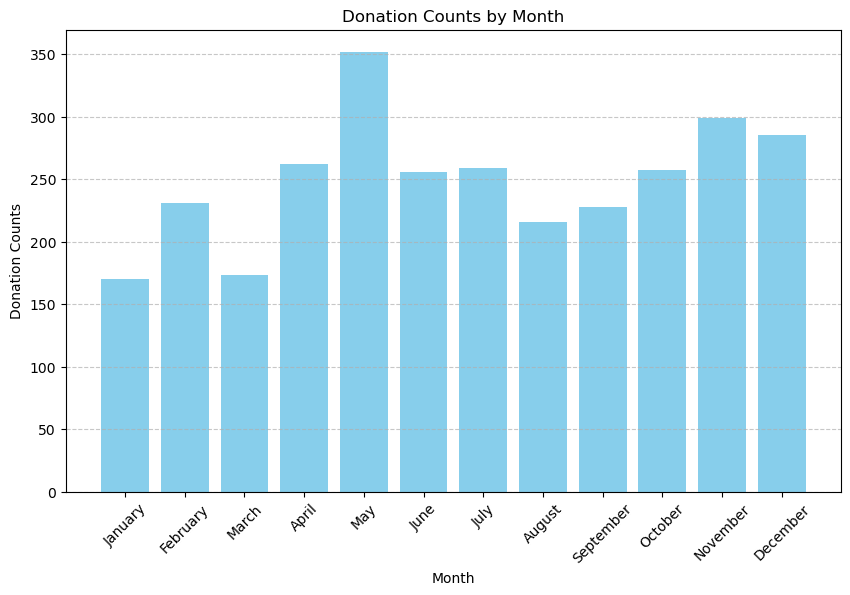

In [13]:
# Function to analyze donation counts based on time of year
def analyze_donations_by_time(csv_file):
    # Dictionary to store donation counts by month
    donation_counts_by_month = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Parse date
            date = row['Date']
            month = int(date.split('/')[0])

            # Count donations for each month
            if month in donation_counts_by_month:
                donation_counts_by_month[month] += 1
            else:
                donation_counts_by_month[month] = 1
    
    return donation_counts_by_month

# Call the function to analyze donations by time
donation_counts_by_month = analyze_donations_by_time('clean_dataset.csv')

# Plot the donation counts by month
months = list(donation_counts_by_month.keys())
counts = list(donation_counts_by_month.values())

month_names = [calendar.month_name[month] for month in months]

plt.figure(figsize=(10, 6))
plt.bar(month_names, counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Donation Counts')
plt.title('Donation Counts by Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

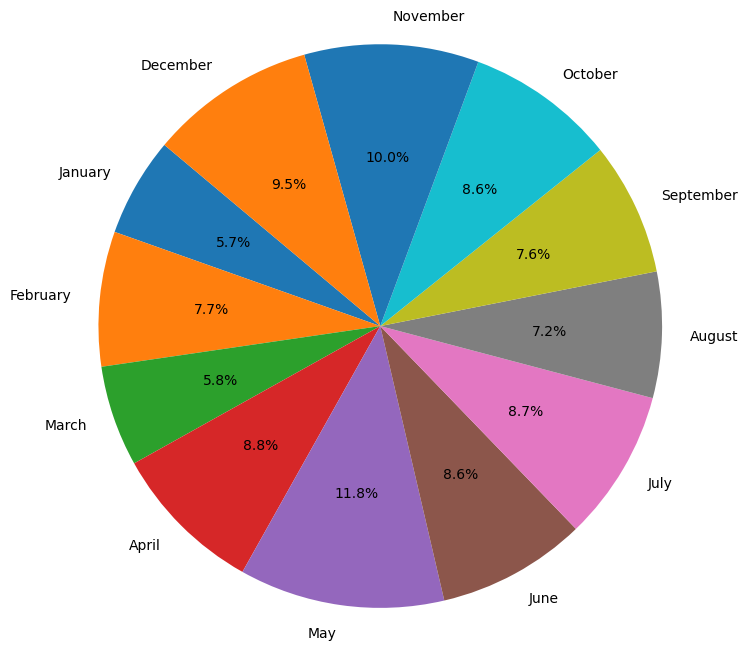

In [14]:
# Function to analyze donation counts based on time of year
def analyze_donations_by_time(csv_file):
    # Dictionary to store donation counts by month
    donation_counts_by_month = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Parse date
            date = row['Date']
            month = int(date.split('/')[0])

            # Count donations for each month
            if month in donation_counts_by_month:
                donation_counts_by_month[month] += 1
            else:
                donation_counts_by_month[month] = 1
    
    return donation_counts_by_month

# Call the function to analyze donations by time
donation_counts_by_month = analyze_donations_by_time('clean_dataset.csv')

# Plot the donation counts by month using a pie chart
months = list(donation_counts_by_month.keys())
counts = list(donation_counts_by_month.values())

month_names = [calendar.month_name[month] for month in months]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=month_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
# Function to analyze donation counts based on time of year and location
def analyze_donations_by_time_and_location(csv_file):
    # Dictionary to store donation counts by month and location
    donation_counts_by_month_and_location = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Parse date
            date = row['Date']
            month = int(date.split('/')[0])
            location = row['Dropoff Location']

            # Count donations for each month and location
            if location not in donation_counts_by_month_and_location:
                donation_counts_by_month_and_location[location] = {}
            if month not in donation_counts_by_month_and_location[location]:
                donation_counts_by_month_and_location[location][month] = 0
            
            donation_counts_by_month_and_location[location][month] += 1
    
    return donation_counts_by_month_and_location

# Call the function to analyze donations by time and location
donation_counts_by_month_and_location = analyze_donations_by_time_and_location('clean_dataset.csv')

# Create dropdown menu
location_dropdown = widgets.Dropdown(
    options=list(donation_counts_by_month_and_location.keys()),
    description='Location:',
    disabled=False
)

def plot_donation_trends(location):
    plt.figure(figsize=(10, 6))
    months = list(donation_counts_by_month_and_location[location].keys())
    counts = list(donation_counts_by_month_and_location[location].values())
    month_names = [calendar.month_name[month] for month in months]
    
    plt.bar(month_names, counts, color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Donation Counts')
    plt.title(f'Donation Trends by Month for {location}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Display interactive plot
widgets.interactive(plot_donation_trends, location=location_dropdown)

interactive(children=(Dropdown(description='Location:', options=('BOK Fridge & Pantry', 'DiSilvestro Playgroun…

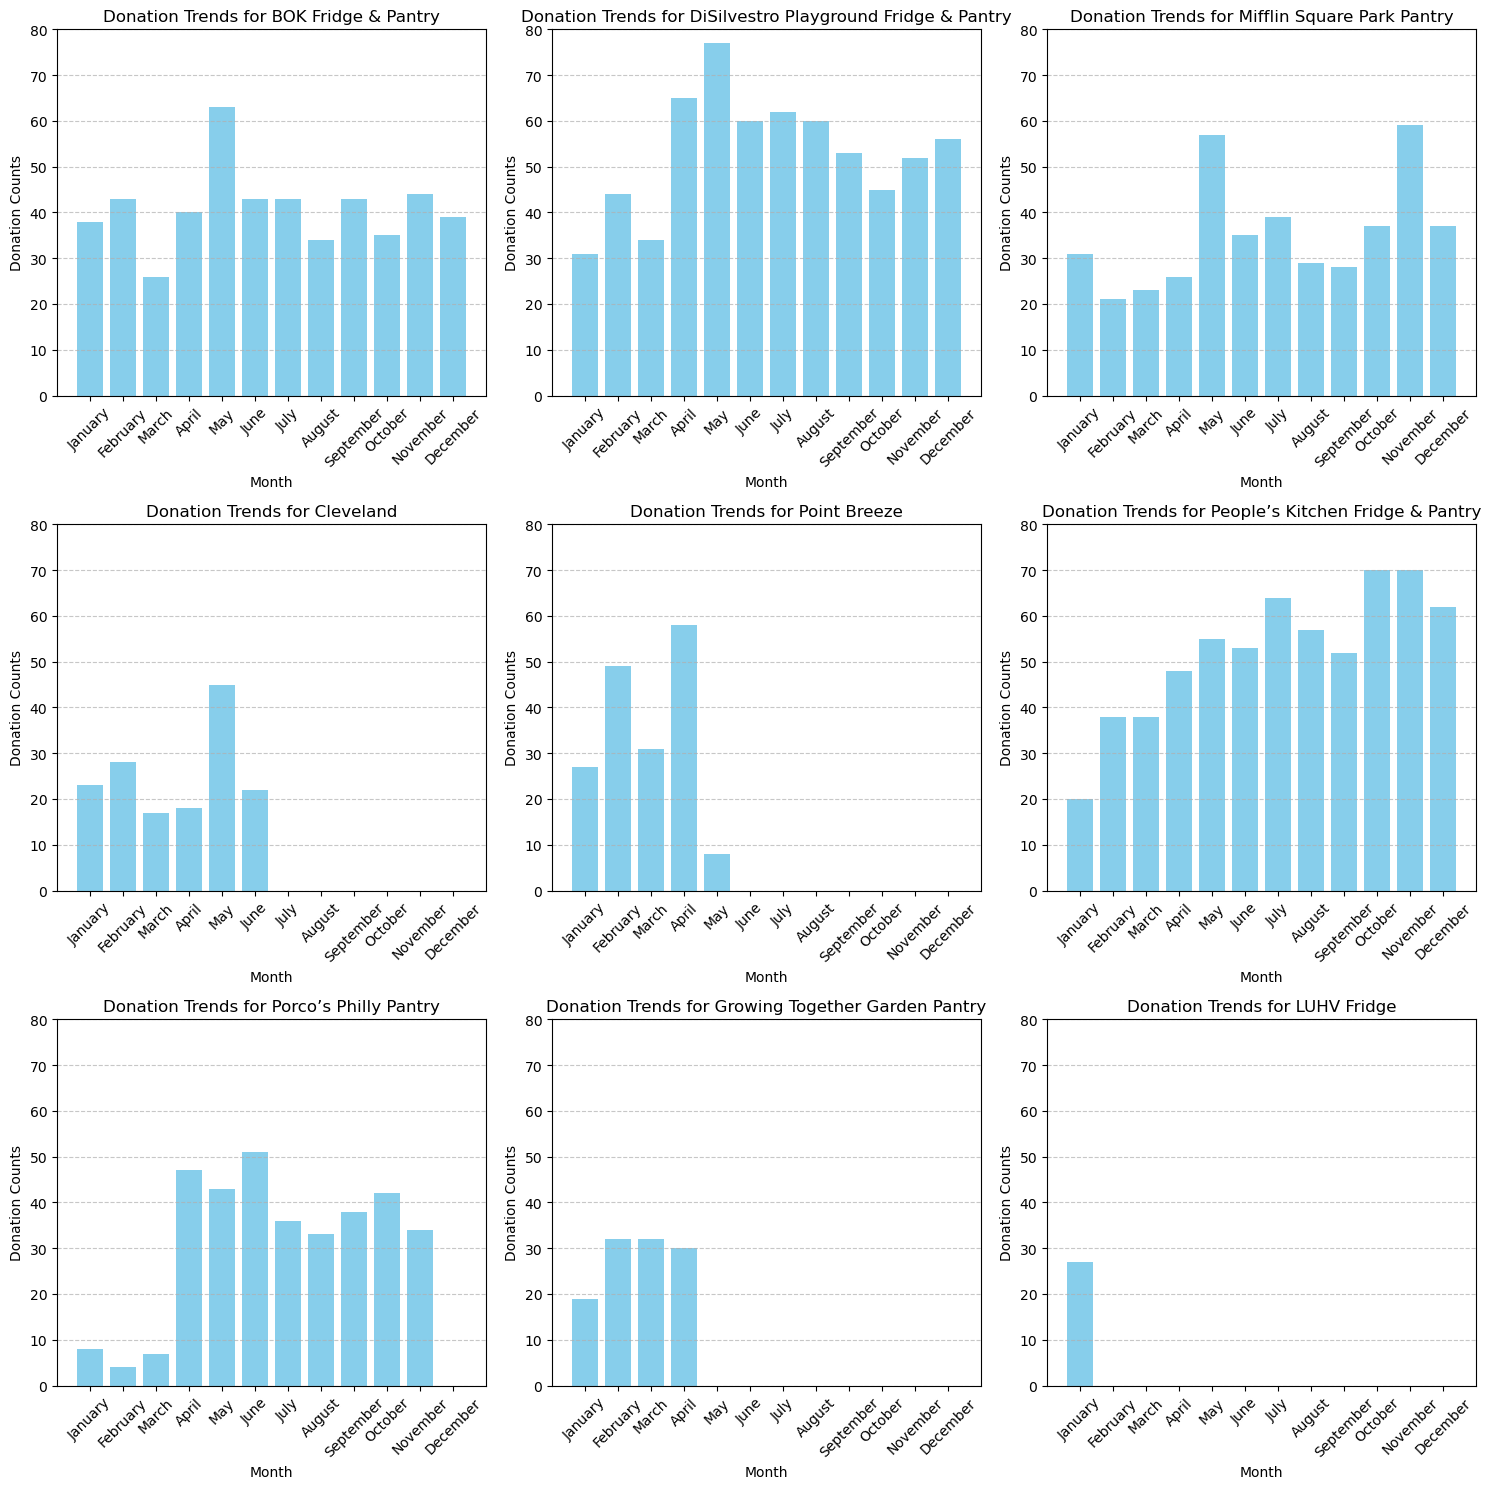

In [16]:
# Function to analyze donation counts based on time of year and location
def analyze_donations_by_time_and_location(csv_file):
    # Dictionary to store donation counts by month and location
    donation_counts_by_month_and_location = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Parse date
            date = row['Date']
            month = int(date.split('/')[0])
            location = row['Dropoff Location']

            # Count donations for each month and location
            if location not in donation_counts_by_month_and_location:
                donation_counts_by_month_and_location[location] = {}
            if month not in donation_counts_by_month_and_location[location]:
                donation_counts_by_month_and_location[location][month] = 0
            
            donation_counts_by_month_and_location[location][month] += 1
    
    # Fill in missing months with zero counts
    for location, counts_by_month in donation_counts_by_month_and_location.items():
        for month in range(1, 13):
            if month not in counts_by_month:
                counts_by_month[month] = 0
    
    return donation_counts_by_month_and_location

# Call the function to analyze donations by time and location
donation_counts_by_month_and_location = analyze_donations_by_time_and_location('clean_dataset.csv')

# Create dropdown menu
location_dropdown = widgets.Dropdown(
    options=list(donation_counts_by_month_and_location.keys()),
    description='Location:',
    disabled=False
)

def plot_donation_trends(location):
    plt.figure(figsize=(15, 5))
    months = list(donation_counts_by_month_and_location[location].keys())
    counts = list(donation_counts_by_month_and_location[location].values())
    month_names = [calendar.month_name[month] for month in range(1, 13)]
    
    plt.bar(month_names, counts, color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Donation Counts')
    plt.title(f'Donation Trends by Month for {location}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display interactive plot for all locations in a 3x3 grid
locations = list(donation_counts_by_month_and_location.keys())
num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, location in enumerate(locations):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    months = list(donation_counts_by_month_and_location[location].keys())
    counts = list(donation_counts_by_month_and_location[location].values())
    month_names = [calendar.month_name[month] for month in range(1, 13)]
    
    ax.bar(month_names, counts, color='skyblue')
    ax.set_xlabel('Month')
    ax.set_ylabel('Donation Counts')
    ax.set_title(f'Donation Trends for {location}')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0,80)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
